In [4]:
# all imports and env variables

import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import datetime
import pandas_datareader.data as web
import yfinance as yf
from pandas_datareader import data as pdr

import numpy as np
import matplotlib.pyplot as plt
import requests
from IPython.display import HTML

plt.style.use(style='ggplot')

start = datetime.datetime(2017, 3, 28)
end = datetime.datetime(2022, 2, 28)

# 1) Using pandas datareader and Yahoo Finance
yf.pdr_override()

#amzn = pdr.get_data_yahoo('AMZN', start = start)


In [6]:
# If we want to download multipe stocks into a single dataframe:

all_stocks_list = ['AMZN', 'FB', 'MMM', 'IBM']
all_stocks = yf.download(all_stocks_list, start = start, end= end)


[*********************100%***********************]  4 of 4 completed


In [7]:
all_stocks.info() #adjusted close is inside dateframe


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1239 entries, 2017-03-28 to 2022-02-25
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AMZN)  1239 non-null   float64
 1   (Adj Close, FB)    1239 non-null   float64
 2   (Adj Close, IBM)   1239 non-null   float64
 3   (Adj Close, MMM)   1239 non-null   float64
 4   (Close, AMZN)      1239 non-null   float64
 5   (Close, FB)        1239 non-null   float64
 6   (Close, IBM)       1239 non-null   float64
 7   (Close, MMM)       1239 non-null   float64
 8   (High, AMZN)       1239 non-null   float64
 9   (High, FB)         1239 non-null   float64
 10  (High, IBM)        1239 non-null   float64
 11  (High, MMM)        1239 non-null   float64
 12  (Low, AMZN)        1239 non-null   float64
 13  (Low, FB)          1239 non-null   float64
 14  (Low, IBM)         1239 non-null   float64
 15  (Low, MMM)         1239 non-null   float64
 16  (Open,

In [8]:
#resample based on end of buisness month
BM_adjCL= all_stocks.resample("BM").last().iloc[:,:4]
BM_adjCL.info() #resampled, 60 months of data
BM_adjCL.columns=['AMZN','FB','IBM','MMM'] #change column headers
BM_adjCL.info()
BM_adjCL.head(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2017-03-31 to 2022-02-28
Freq: BM
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AMZN)  60 non-null     float64
 1   (Adj Close, FB)    60 non-null     float64
 2   (Adj Close, IBM)   60 non-null     float64
 3   (Adj Close, MMM)   60 non-null     float64
dtypes: float64(4)
memory usage: 2.3 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2017-03-31 to 2022-02-28
Freq: BM
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    60 non-null     float64
 1   FB      60 non-null     float64
 2   IBM     60 non-null     float64
 3   MMM     60 non-null     float64
dtypes: float64(4)
memory usage: 2.3 KB


,AMZN,FB,IBM,MMM
Date,,,,
2017-03-31,886.539978,142.050003,130.556808,164.108856
2017-04-28,924.989990,150.250000,120.173134,167.968613
2017-05-31,994.619995,151.460007,115.600029,176.426849
2017-06-30,968.000000,150.979996,116.508873,179.636642
2017-07-31,987.780029,169.250000,109.571228,173.579437
2017-08-31,980.599976,171.970001,109.526901,177.311417
2017-09-29,961.349976,170.869995,111.096718,182.153793
2017-10-31,1105.280029,180.059998,117.973282,199.761734
2017-11-30,1176.750000,177.179993,119.137619,212.064331


Text(0.5, 1.0, 'MMM')

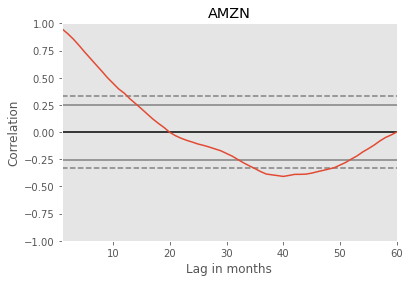

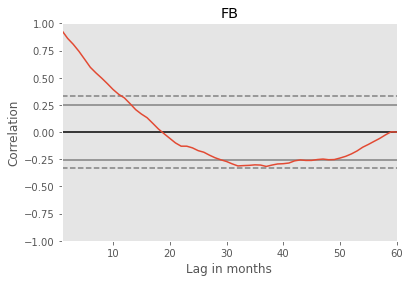

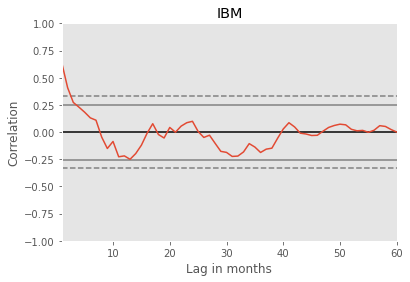

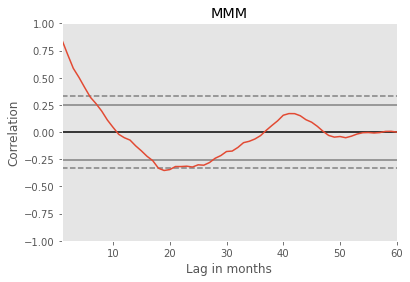

In [9]:
plt.figure(1)

pd.plotting.autocorrelation_plot(BM_adjCL['AMZN'])
plt.xlabel('Lag in months')
plt.ylabel('Correlation')
plt.title('AMZN')
plt.figure(2)

pd.plotting.autocorrelation_plot(BM_adjCL['FB'])
plt.xlabel('Lag in months')
plt.ylabel('Correlation')
plt.title('FB')
plt.figure(3)


pd.plotting.autocorrelation_plot(BM_adjCL['IBM'])
plt.xlabel('Lag in months')
plt.ylabel('Correlation')
plt.title('IBM')
plt.figure(4)


pd.plotting.autocorrelation_plot(BM_adjCL['MMM'])
plt.xlabel('Lag in months')
plt.ylabel('Correlation')
plt.title('MMM')

#all stocks show high autocorrelation in very low lags. 1 lag = 1 buisness month as that is how we resampled the dataframe. 
#AMZN and FB show high correlation up to 15 months. After that point the correlation becomes less meaningful in 0.25 - -0.25
#range. IBM has low correlation and sit for the most part in the low correlation range. MMM is simillar to FB and AMZN however
#it only has high correlation the first 5 or so lags.




In [10]:
BM_adjCL.head(5) # test to make sure values make sense.
BM_adjCL['AMZN_RET']=BM_adjCL['AMZN']/BM_adjCL['AMZN'].shift(1)
BM_adjCL['FB_RET']=BM_adjCL['FB']/BM_adjCL['FB'].shift(1)
BM_adjCL['IBM_RET']=BM_adjCL['IBM']/BM_adjCL['IBM'].shift(1)
BM_adjCL['MMM_RET']=BM_adjCL['MMM']/BM_adjCL['MMM'].shift(1)
BM_adjCL.info()
BM_adjCL.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2017-03-31 to 2022-02-28
Freq: BM
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AMZN      60 non-null     float64
 1   FB        60 non-null     float64
 2   IBM       60 non-null     float64
 3   MMM       60 non-null     float64
 4   AMZN_RET  59 non-null     float64
 5   FB_RET    59 non-null     float64
 6   IBM_RET   59 non-null     float64
 7   MMM_RET   59 non-null     float64
dtypes: float64(8)
memory usage: 4.2 KB


,AMZN,FB,IBM,MMM,AMZN_RET,FB_RET,IBM_RET,MMM_RET
Date,,,,,,,,
2017-03-31,886.539978,142.050003,130.556808,164.108856,NaN,NaN,NaN,NaN
2017-04-28,924.989990,150.250000,120.173134,167.968613,1.043371,1.057726,0.920466,1.023519
2017-05-31,994.619995,151.460007,115.600029,176.426849,1.075276,1.008053,0.961946,1.050356
2017-06-30,968.000000,150.979996,116.508873,179.636642,0.973236,0.996831,1.007862,1.018193
2017-07-31,987.780029,169.250000,109.571228,173.579437,1.020434,1.121009,0.940454,0.966281


Text(0.5, 1.0, 'MMM_RET')

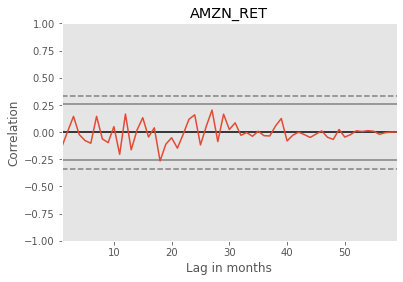

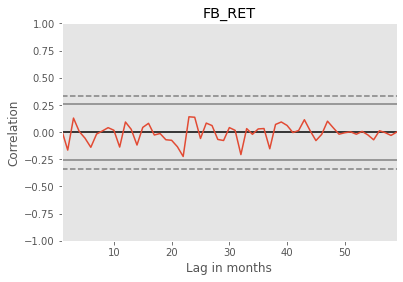

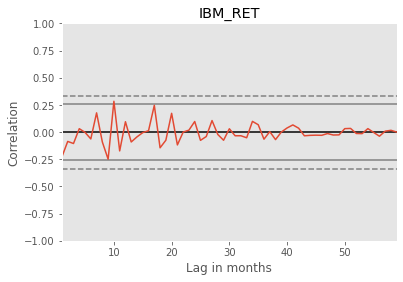

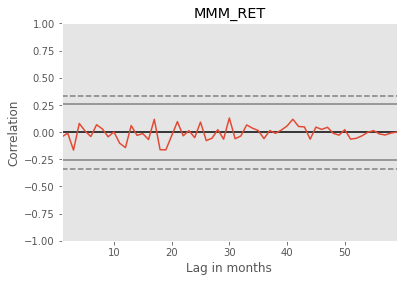

In [11]:
plt.figure(5)
#must drop NA as the first row is NA due to the shift
pd.plotting.autocorrelation_plot(BM_adjCL['AMZN_RET'].dropna())
plt.xlabel('Lag in months')
plt.ylabel('Correlation')
plt.title('AMZN_RET')

plt.figure(6)
pd.plotting.autocorrelation_plot(BM_adjCL['FB_RET'].dropna())
plt.xlabel('Lag in months')
plt.ylabel('Correlation')
plt.title('FB_RET')
plt.figure(3)

pd.plotting.autocorrelation_plot(BM_adjCL['IBM_RET'].dropna())
plt.xlabel('Lag in months')
plt.ylabel('Correlation')
plt.title('IBM_RET')
plt.figure(4)

pd.plotting.autocorrelation_plot(BM_adjCL['MMM_RET'].dropna())
plt.xlabel('Lag in months')
plt.ylabel('Correlation')
plt.title('MMM_RET')

# The stocks show no significant sign of autocorrelation in returns on a month by month basis. This is because all charts
# track in between the 0.25 and -0.25.

,AMZN_RET,FB_RET,IBM_RET,MMM_RET
Date,,,,
2017-04-28,1.043371,1.057726,0.920466,1.023519
2017-05-31,1.075276,1.008053,0.961946,1.050356
2017-06-30,0.973236,0.996831,1.007862,1.018193
2017-07-31,1.020434,1.121009,0.940454,0.966281
2017-08-31,0.992731,1.016071,0.999595,1.021500
2017-09-29,0.980369,0.993604,1.014333,1.027310
2017-10-31,1.149717,1.053784,1.061897,1.096665
2017-11-30,1.064662,0.984005,1.009869,1.061586
2017-12-29,0.993813,0.995936,0.996428,0.968043


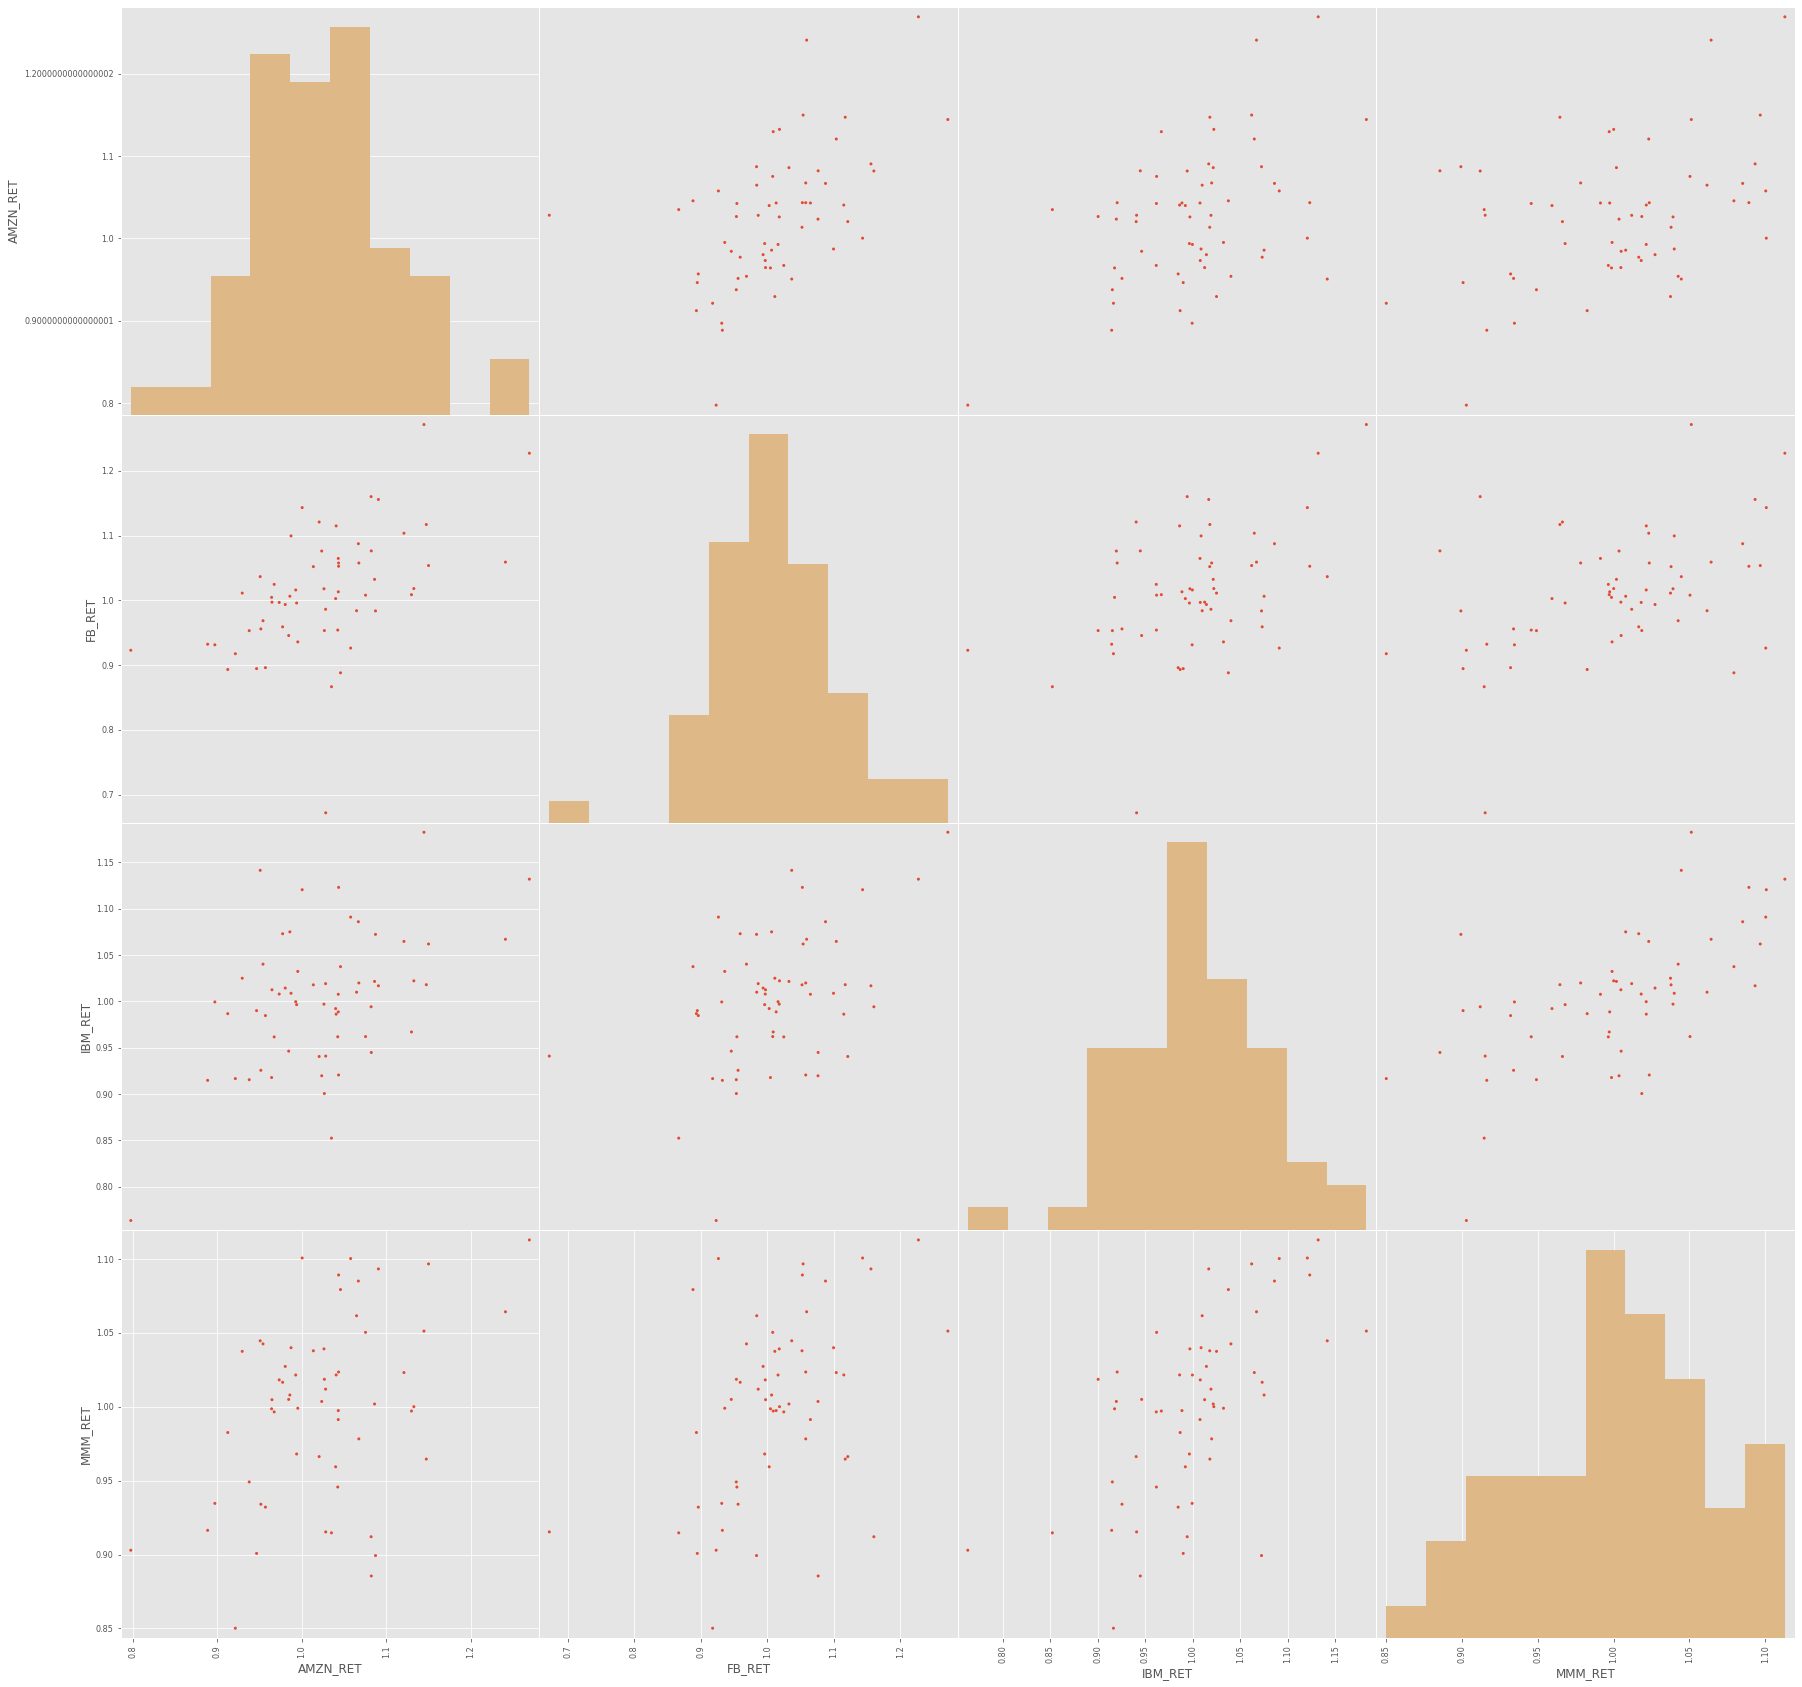

In [12]:
stock_ret=BM_adjCL.iloc[1:,4:] #drop the first row of NA

pd.plotting.scatter_matrix(BM_adjCL.iloc[1:,4:], 
                           alpha=1, 
                           figsize=(30,30),
                           hist_kwds={'color':['burlywood']})

stock_ret.head(10)

#scatter matrix displays many items. The histogram on the diagonal represent the distribution of stocks returns. AMZN and FB
# look like they are distributed normally with a relatively small std dev.
# In terms of returns, a tighter distribution may mean that the stock sees less volatility (not many large swings in price (outliers))
#and offers simillar returns year after year. The distributions looks to be slightly right skewed, meaning averaging positive returns.

# the scatter plots show correlation between stock prices as well. Most scatter looks to have a slightly positive correlation.
# some relationships look to have high positive correlation (AMZN x FB, MMM x IBM). Does not seem to have any with a negative
# correlation. Seeing as the data is sampled over 5 years once a month, this makes sense to me as the market tends to grow 
# year over year. Positive correlation may be related to simillar industry (AMZN, FB) or large stable corporations with regular
# growth (MMM, IBM)
